# Visualize Direction of Relationships

- The correlation falls between -1 and 1 ($-1 \leq r_{xy} \leq 1$).
- If $r_{xy} > 0$, the association is **positive**, 
- If $r_{xy} < 0$, the association is **negative**, and
- If $r_{xy} = 0$, it indicates **no linear relationship**.
- The **larger** the absolute value $r_{xy}$, the **stronger** the association.

Let's investigate how the scatter plot changes as the correlation changes.

In [10]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=14,6

# define a corr function with flexible corr input
def corr_widget(corr = 0):
    
    # Defining the mean vector
    mean_x_y = np.array([20,30])

    # Setting sd and corr 

    sigma_x = 4
    sigma_y = 5
    corr_x_y = corr

    # Defining the variance-covariance matrix

    cov_x_y = np.array([[sigma_x**2, corr_x_y*sigma_x*sigma_y], [corr_x_y*sigma_x*sigma_y, sigma_y**2]])

    # Generating a data based on bivariate normal distribution
    # with given mean vector and variance-covariance matrix
    
    data = stats.multivariate_normal.rvs(mean = mean_x_y, cov = cov_x_y, size = 100)

    # Plotting the generated samples
    
    plt.plot(data[:,0],data[:,1], 'o', c='blue')
    plt.title(f'Correlation between X and Y = {corr_x_y}')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()

#turn it into a widget
corr_wid = widgets.FloatSlider(min = -1, max = 1, step=0.1, value=0, description = "$r_x_y$")
#display(corr_wid)    

Now, play with the follwing slider to see how correlation changes.

In [11]:
widgets.interact(corr_widget, corr = corr_wid);

interactive(children=(FloatSlider(value=0.0, description='$r_x_y$', max=1.0, min=-1.0), Output()), _dom_classe…

## Example 

- An educational economist may want to build the relationship between an individual's income (in $) and education (in years).

- S/he takes a random sample of 10 individuals and asks for their income (in $1000s) and education (in years). 

- The results are shown below: 

In [12]:
#present data
data = {'Education': [11,12,13,15,8,10,11,12,17,11],
        'Income': [25,27,30,41,18,23,26,24,48,26]} 
data

{'Education': [11, 12, 13, 15, 8, 10, 11, 12, 17, 11],
 'Income': [25, 27, 30, 41, 18, 23, 26, 24, 48, 26]}

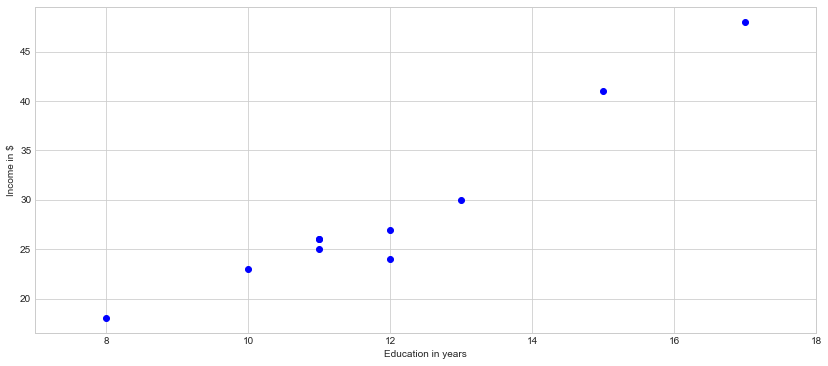

In [14]:
# plot education vs income to explore the relationship
plt.style.use('seaborn-whitegrid')
plt.plot(data['Education'],data['Income'], 'o', c='blue')
plt.xlim([np.min(data['Education'])-1, np.max(data['Education'])+1])
plt.xlabel('Education in years')
plt.ylabel('Income in $')
plt.show()

The scatter plot between the education (in years) and income (in dollars) shows a **linear
relationship**. Let's compute the sample correlation coefficient $r_{xy}$ between the education and income.

In [15]:
# get the corr between education and income
corr = np.corrcoef(data['Education'],data['Income'])
# Print the result
print(corr)

[[1.        0.9651672]
 [0.9651672 1.       ]]


This indicates **a strong and positive** linear relationship between Education in years and Income.

#### Session Info

In [ ]:
import session_info
session_info.show()